In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)  # Default plot size

import os
os.getcwd()

%cd /g/data/p66/ars599/work_ppe


/g/data/p66/ars599/work_ppe


In [5]:
'''
Functions
plot_eof2
https://pypi.org/project/sacpy/
'''
import sacpy as scp
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import sacpy.Map as smap
from scipy.linalg import svd

def plot_eof2_pcs(ssta):
    '''
    # Example usage:
    # Assuming you have a variable 'ssta'
    ssta = n3_anom1.ts
    plot_eof(ssta)
    '''
    eof = scp.EOF(np.array(ssta))
    eof.solve()
    pc = eof.get_pc(npt=2)
    pt = eof.get_pt(npt=2)

    lon, lat = np.array(ssta.lon), np.array(ssta.lat)

    # Check and ensure positive pt at 90W 0N
    lon_index = np.abs(lon - 240).argmin()  # Find the index for 120W
    lat_index = np.abs(lat - 0).argmin()    # Find the index for 0N

    if pt[0, lat_index, lon_index] < 0:
        pt[0] *= -1
        pc[0] *= -1
    if pt[1, lat_index, lon_index] < 0:
        pt[1] *= -1
        pc[1] *= -1

    # Return the PCs as a tuple
    return pc

def calculate_n3_anom(var, ystart, ylast):
    ystart_str = str(ystart).zfill(4)
    ylast_str = str(ylast).zfill(4)
    var = var.sel(time=slice(ystart_str, ylast_str))
    var_clim = var.groupby("time.month").mean(dim="time")
    var_anom = var.groupby("time.month") - var_clim
    return var_anom
def detrend_dim(da, dim, deg=1):
    # detrend along a single dimension
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(da[dim], p.polyfit_coefficients)
    return da - fit

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the colormap
colors = [
    (0.0000000e+00, 0.0000000e+00, 1.0000000e+00),
    (1.0000000e-01, 1.0000000e-01, 1.0000000e+00),
    (2.0000000e-01, 2.0000000e-01, 1.0000000e+00),
    (3.0000000e-01, 3.0000000e-01, 1.0000000e+00),
    (4.0000000e-01, 4.0000000e-01, 1.0000000e+00),
    (5.0000000e-01, 5.0000000e-01, 1.0000000e+00),
    (6.0000000e-01, 6.0000000e-01, 1.0000000e+00),
    (7.0000000e-01, 7.0000000e-01, 1.0000000e+00),
    (8.0000000e-01, 8.0000000e-01, 1.0000000e+00),
    (9.0000000e-01, 9.0000000e-01, 1.0000000e+00),
    (1.0000000e+00, 1.0000000e+00, 1.0000000e+00),
    (1.0000000e+00, 9.0000000e-01, 9.0000000e-01),
    (1.0000000e+00, 8.0000000e-01, 8.0000000e-01),
    (1.0000000e+00, 7.0000000e-01, 7.0000000e-01),
    (1.0000000e+00, 6.0000000e-01, 6.0000000e-01),
    (1.0000000e+00, 5.0000000e-01, 5.0000000e-01),
    (1.0000000e+00, 4.0000000e-01, 4.0000000e-01),
    (1.0000000e+00, 3.0000000e-01, 3.0000000e-01),
    (1.0000000e+00, 2.0000000e-01, 2.0000000e-01),
    (1.0000000e+00, 1.0000000e-01, 1.0000000e-01),
    (1.0000000e+00, 0.0000000e+00, 0.0000000e+00)
]

# Create the colormap
shayne_cmap = LinearSegmentedColormap.from_list("shayne_cmap", colors)

In [45]:
def get_cmip6_data(exp, variable):
    idir = '/g/data/p66/ars599/CMIP6/APP_output/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/piControl/'
    filename = f'{variable}_Amon_ACCESS-CM2_piControl_{exp}_gn_100001-109912.nc'
    fname = os.path.join(idir, exp, 'Amon', variable, 'gn', 'v20231104', filename)
    dataset = xr.open_dataset(fname)
    
    # Perform any additional processing if needed, e.g., calculating the mean.
    # dataset = dataset.mean(['lat', 'lon'])

    return dataset


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, cal

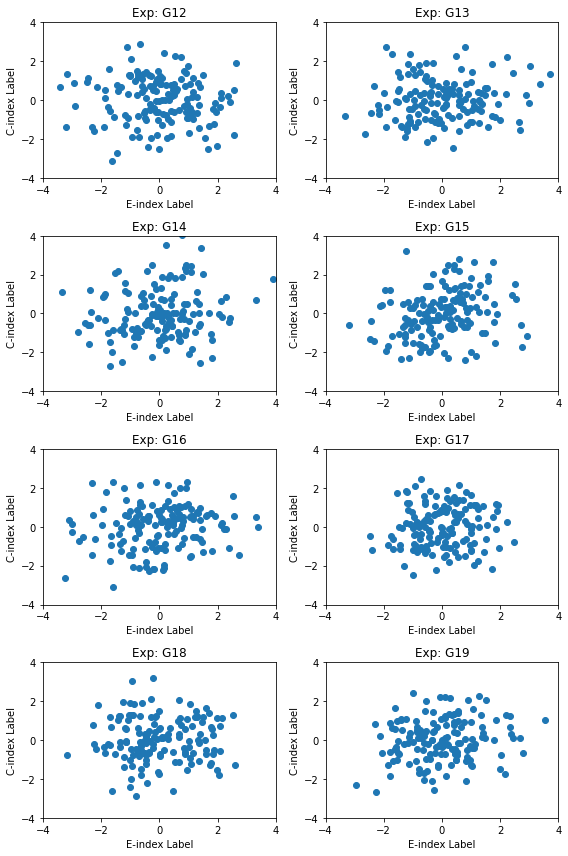

In [96]:
# Define your experiments and job names
experiments = ['r3i1p12f1', 'r3i1p13f1', 'r3i1p14f1', 'r3i1p15f1',
              'r3i1p16f1', 'r3i1p17f1', 'r3i1p18f1', 'r3i1p19f1']
jobNames = ['G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19']

# Create a figure with 4 rows and 2 columns of subplots
fig, ax = plt.subplots(4, 2, figsize=(8, 12))

# Loop through experiments and create scatter plots
for i, exp in enumerate(experiments):
    row = i // 2
    col = i % 2
    ax[row, col].set_title(f'Exp: {jobNames[i]}')

    ds2 = get_cmip6_data(exp, 'ts')
    ts_anom = calculate_n3_anom(ds2.ts, 1050, 1099)
    ts_n34 = ts_anom.sel(lat=slice(-20, 20), lon=slice(20, 150))
    n34 = ts_n34.mean(['lat','lon'])

    pcs_b1sst = plot_eof2_pcs(ts_n34)
    # E-index
    pc1 = (pcs_b1sst[0] - pcs_b1sst[1]) / np.sqrt(2)
    # C-index
    pc2 = (pcs_b1sst[0] + pcs_b1sst[1]) / np.sqrt(2)

    pc1b = n34*0 + pc1
    pc1_djf = pc1b.groupby('time.year').where(pc1b['time.month'].isin([12, 1, 2]))
    
    pc2b = n34*0 + pc2
    pc2_djf = pc2b.groupby('time.year').where(pc2b['time.month'].isin([12, 1, 2]))
    
    # Add the scatter plot to the single subplot
    ax[row, col].scatter(pc1_djf, pc2_djf)
    ax[row, col].set_xlabel('E-index Label')
    ax[row, col].set_ylabel('C-index Label')
    ax[row, col].set_xlim([-4, 4])  # Set x-axis limits for the subplot
    ax[row, col].set_ylim([-4, 4])  # Set y-axis limits for the subplot

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [60]:
idir = '/g/data/p66/ars599/obs/month/'
fName = 'HadISST_sst.1870-2020.N96.dtanom.nc'
dsOBs = xr.open_dataset(idir+fName)

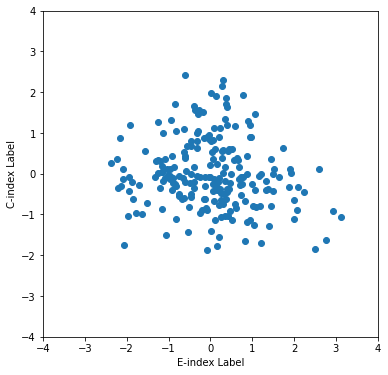

In [94]:
# Create a figure with 1 row and 1 column of subplot
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ts_anom = calculate_n3_anom(dsOBs.sst, 1950, 2022)
ts_n34 = ts_anom.sel(lat=slice(-20, 20), lon=slice(20, 150))
n34 = ts_n34.mean(['lat','lon'])

pcs_b1sst = plot_eof2_pcs(ts_n34)
# E-index
pc1 = pcs_b1sst[0] # (pcs_b1sst[0] - pcs_b1sst[1]) / np.sqrt(2)
# C-index
pc2 = pcs_b1sst[1] # (pcs_b1sst[0] + pcs_b1sst[1]) / np.sqrt(2)

pc1b = n34*0 + pc1
pc1_djf = pc1b.groupby('time.year').where(pc1b['time.month'].isin([12, 1, 2]))

pc2b = n34*0 + pc2
pc2_djf = pc2b.groupby('time.year').where(pc2b['time.month'].isin([12, 1, 2]))

# Add the scatter plot to the single subplot
ax.scatter(pc1_djf, pc2_djf)
ax.set_xlabel('E-index Label')
ax.set_ylabel('C-index Label')
ax.set_xlim([-4, 4])  # Set x-axis limits
ax.set_ylim([-4, 4])  # Set y-axis limits

# Show the plot
plt.show()